# Main Library

In [1]:
import cv2
import matplotlib.pyplot as plt

# Loading Models

In [2]:
face_model = r"D:\Courses language programming\9_Big Projects\13 - DL - Age-Gender\data\opencv_face_detector_uint8.pb"
face_config = r"D:\Courses language programming\9_Big Projects\13 - DL - Age-Gender\data\opencv_face_detector.pbtxt"

age_model = r"D:\Courses language programming\9_Big Projects\13 - DL - Age-Gender\data\age_net.caffemodel"
age_config = r"D:\Courses language programming\9_Big Projects\13 - DL - Age-Gender\data\age_deploy.prototxt"

gender_model = r"D:\Courses language programming\9_Big Projects\13 - DL - Age-Gender\data\gender_net.caffemodel"
gender_config = r"D:\Courses language programming\9_Big Projects\13 - DL - Age-Gender\data\gender_deploy.prototxt"

face_net = cv2.dnn.readNet(face_model, face_config)
age_net = cv2.dnn.readNet(age_model, age_config)
gender_net = cv2.dnn.readNet(gender_model, gender_config)

# Face Detection

In [3]:
def Face_Detection(image):
    image_copy = image.copy()
    image_height, image_width = image_copy.shape[0], image_copy.shape[1]

    blob = cv2.dnn.blobFromImage(image_copy, 1.0, (200, 200), mean=(104, 117, 123), swapRB=True, crop=False)
    face_net.setInput(blob)

    detections = face_net.forward()

    bboxes = []
    for i in range(detections.shape[2]):
        if detections[0, 0, i, 2] > 0.7:
            x1 = int(detections[0, 0, i, 3] * image_width)
            y1 = int(detections[0, 0, i, 4] * image_height)
            x2 = int(detections[0, 0, i, 5] * image_width)
            y2 = int(detections[0, 0, i, 6] * image_height)

            bboxes.append([x1, y1, x2, y2])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 8)
            
    return [image, bboxes]


In [4]:
def Age_Gender_Detector(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    [image_face, bboxes] = Face_Detection(image)

    gender = ["Male", "Female"]
    ages = ["(1-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)" ,"(38-43)", "(48-53)", "(60-100)"]
    padding = 20


    for bboxe in bboxes:
        face = image[max(0, bboxe[1]  - padding) : min(bboxe[3]+padding, image.shape[0]), max(0, bboxe[0]- padding) : min(bboxe[2] + padding, image.shape[1])]
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), mean=(78, 87, 114), swapRB=False)

        age_net.setInput(blob)
        age_predict = age_net.forward()
        age_pic = ages[age_predict[0].argmax()]


        gender_net.setInput(blob)
        gender_predict = gender_net.forward()
        gender_pic = gender[gender_predict[0].argmax()]


        info = f"{gender_pic} - {age_pic}"
        cv2.putText(image_face, info,(bboxe[0], bboxe[1] - 10), cv2.FONT_ITALIC, 0.99, (0, 0, 225), 3)
        
        return image_face

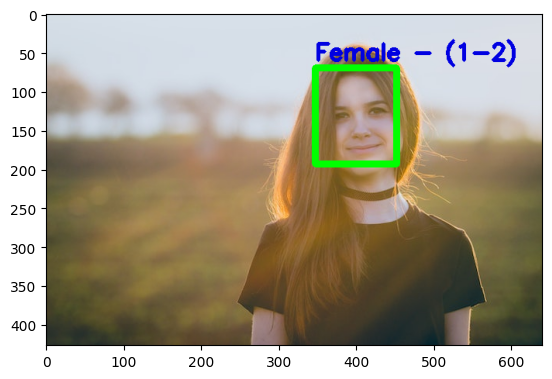

In [7]:
image = cv2.imread(r"D:\Pycharm\Computer Vision\imgs-20230715T083046Z-001\girl.jpg")
 
image_face = Age_Gender_Detector(image)    
plt.imshow(image_face)
plt.show()

In [12]:
video = cv2.VideoCapture(0)

while True:
    _, image = video.read()
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    face_img = Age_Gender_Detector(image)
    
    cv2.imshow("image", face_img)
    if cv2.waitKey(1) == ord("o"): break
        
video.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
